# Import Module & Define Function

In [1]:
# import the necessary packages
import imutils
import cv2
from matplotlib import pyplot as plt
import numpy
import os
import pandas
import pickle

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
# function to return key for any value
def get_key_dict1(val):
    val_bw = cv2.cvtColor(val, cv2.COLOR_BGR2GRAY)
    val_bin = numpy.interp(val_bw, (val_bw.min(), val_bw.max()), (0, +1))
    for key, dict_list in stage_display_1_dictionary.items():
        for dict_val in dict_list:
            if numpy.array_equal(val_bin,dict_val):
                return True, key
    return False, 0

def get_key_dict2(val):
    val_bw = cv2.cvtColor(val, cv2.COLOR_BGR2GRAY)
    val_bin = numpy.interp(val_bw, (val_bw.min(), val_bw.max()), (0, +1))
    for key, value in stage_display_2_dictionary.items():
        if val_bin == value:
            return True, key
    return False, 0

In [4]:
def new_stage_check(current_frame, last_stage):
    #frame = cv2.imread(f'game_frame/participant_{participant}/participant_0_30000/game_{current_frame}.png')
    frame = cv2.imread(f'game_frame/game_frame_participant_{participant}/game_{current_frame}.png')
    frame_stage_1 = frame[24:31,152:159]
    frame_stage_2 = frame[24:31,168:175]
    num1_valid, stage_num1 = get_key_dict1(frame_stage_1)
    num2_valid, stage_num2 = get_key_dict1(frame_stage_2)
    if not num1_valid&num2_valid:
        return False, last_stage
    if f"{stage_num1}-{stage_num2}" == last_stage:
        return False, last_stage
    else: 
        return True, f"{stage_num1}-{stage_num2}"
    

In [5]:
def count_files(path):
    count = 0
    for root_dir, cur_dir, files in os.walk(path):
        count += len(files)
    return count

# Original (Testing)

In [10]:
img1 = cv2.imread(f'game_frame/game_frame_participant_1/game_200.png')

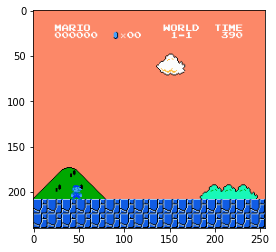

In [11]:
plt.imshow(img1)
plt.show()

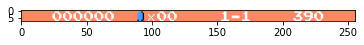

In [12]:
plt.imshow(img1[23:31,:])
plt.show()

In [ ]:
display_1_dictionary = []
for image in stage_display_1:
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_bin = numpy.interp(image_bw, (image_bw.min(), image_bw.max()), (0, +1))
    flag=False
    for item in display_1_dictionary:
        if numpy.array_equal(item,image_bin):
            flag=True
            break
        else:
            flag=False
    if flag!=True:
        display_1_dictionary.append(image_bin)
    
    print(len(display_1_dictionary))

In [ ]:
display_2_dictionary = []
for image in stage_display_2:
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_bin = numpy.interp(image_bw, (image_bw.min(), image_bw.max()), (0, +1))
    flag=False
    for item in display_2_dictionary:
        if numpy.array_equal(item,image_bin):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    if flag!=True:
        display_2_dictionary.append(image_bin)
    
    print(len(display_2_dictionary))

In [ ]:
for image in display_1_dictionary:
    flag=False
    for item in display_2_dictionary:
        if numpy.array_equal(item,image):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    print(flag)

In [ ]:
for image in display_2_dictionary:
    plt.imshow(image, cmap='gray')
    print(image)
    plt.show()

# All image (Finding dictionary)

In [ ]:
print("going")
image_lib = load_images_from_folder('game_frame/participant_0/participant_0_90001_end')
print("imported")

In [23]:
stage_display_1_lib=[]
stage_display_2_lib=[]

In [ ]:
for i,image in enumerate(image_lib):
    
    d1 = image[24:31,152:159]
    d2 = image[24:31,168:175]
    image_bw1 = cv2.cvtColor(d1, cv2.COLOR_BGR2GRAY)
    image_bin1 = numpy.interp(image_bw1, (image_bw1.min(), image_bw1.max()), (0, +1))
    flag=False
    for item in stage_display_1_lib:
        if numpy.array_equal(item,image_bin1):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    if flag!=True:
        stage_display_1_lib.append(image_bin1)
        print(f"new1 {i}")

    image_bw2 = cv2.cvtColor(d2, cv2.COLOR_BGR2GRAY)
    image_bin2 = numpy.interp(image_bw2, (image_bw2.min(), image_bw2.max()), (0, +1))
    flag=False
    for item in stage_display_2_lib:
        if numpy.array_equal(item,image_bin2):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    if flag!=True:
        stage_display_2_lib.append(image_bin2)
        #numpy.append(stage_display_2_lib,image_bin2)
        print(f"new2 {i}")
print("end")

In [59]:
len(stage_display_1_lib)

127

In [60]:
len(stage_display_2_lib)

83

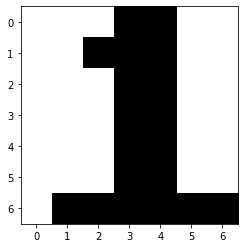

0


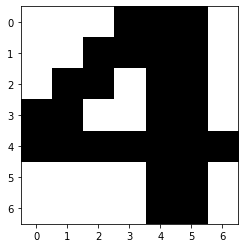

1


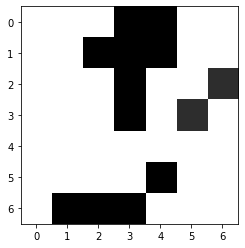

2


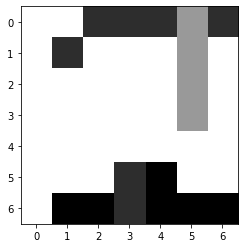

3


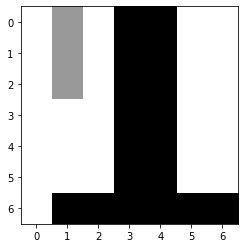

4


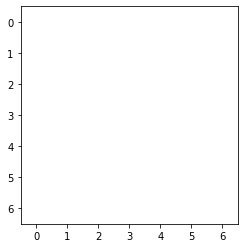

5


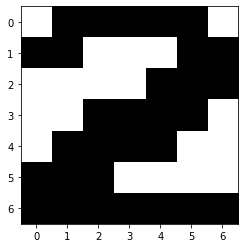

6


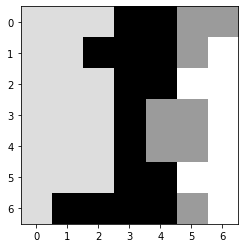

7


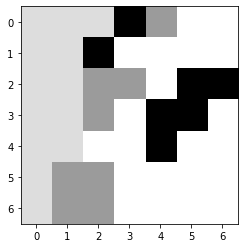

8


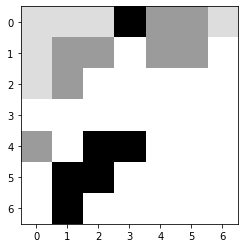

9


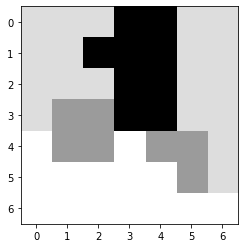

10


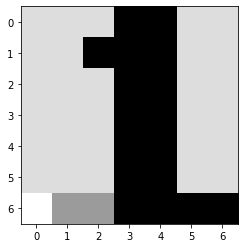

11


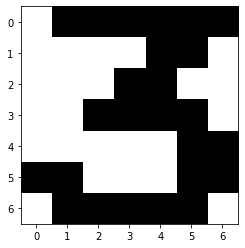

12


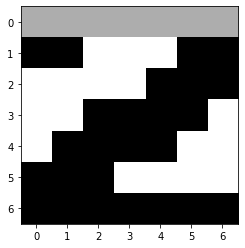

13


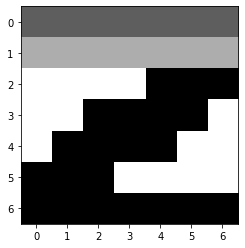

14


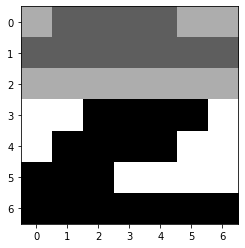

15


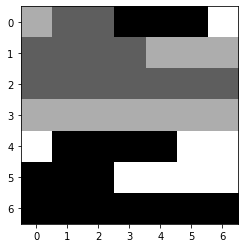

16


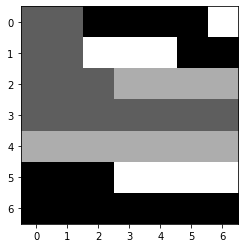

17


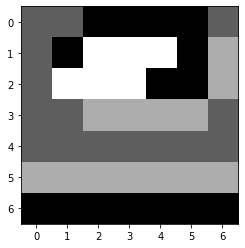

18


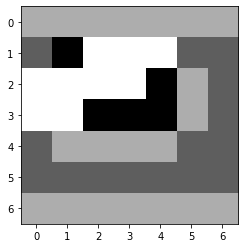

19


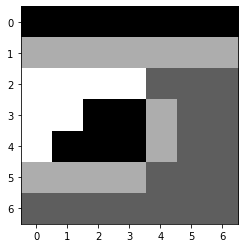

20


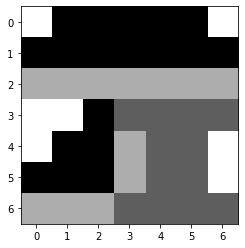

21


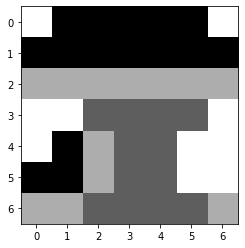

22


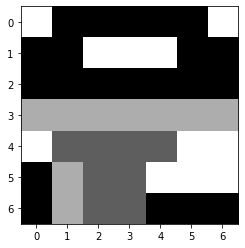

23


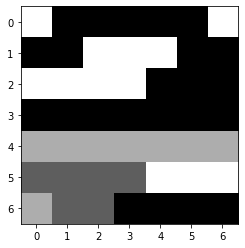

24


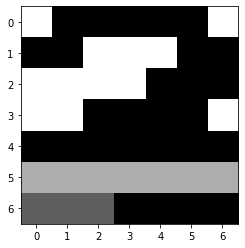

25


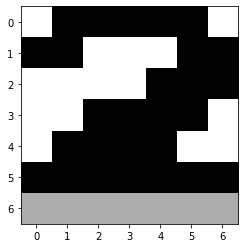

26


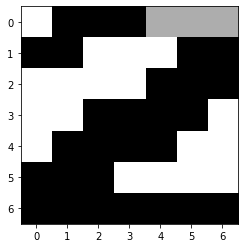

27


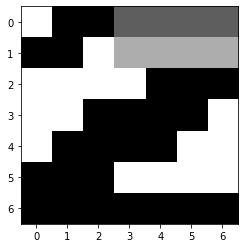

28


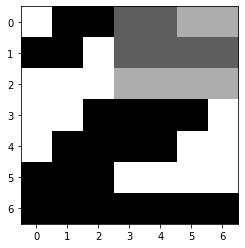

29


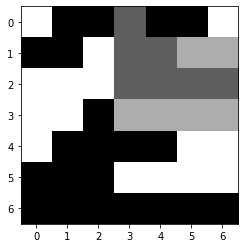

30


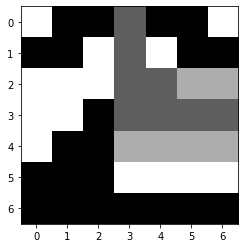

31


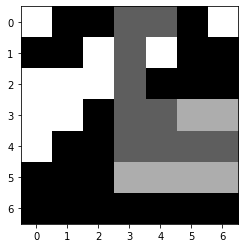

32


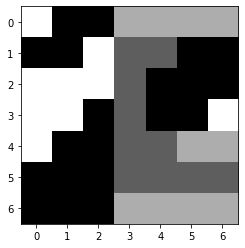

33


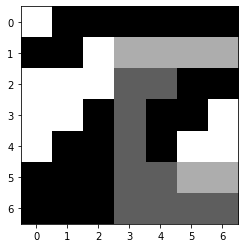

34


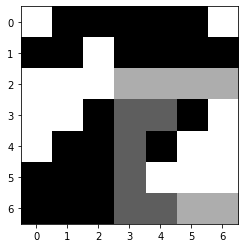

35


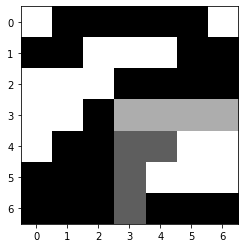

36


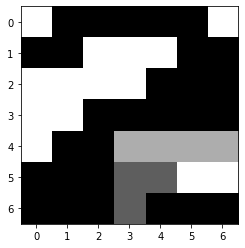

37


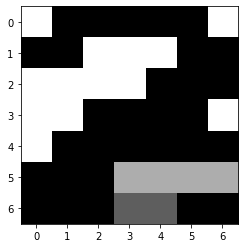

38


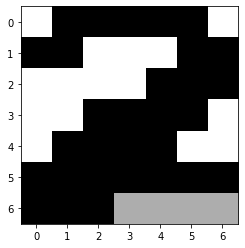

39


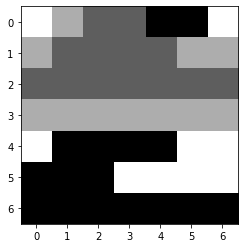

40


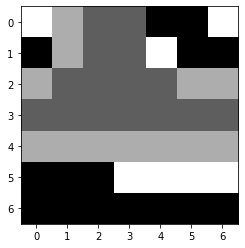

41


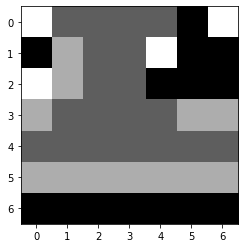

42


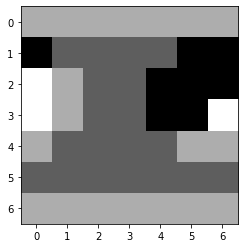

43


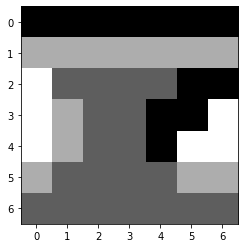

44


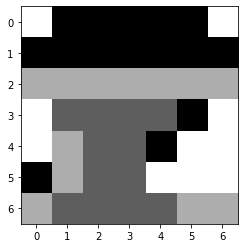

45


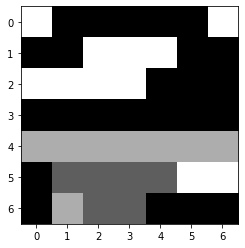

46


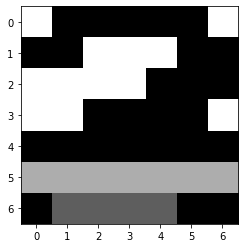

47


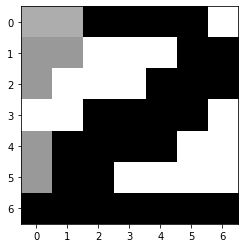

48


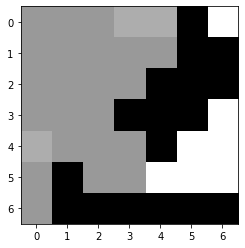

49


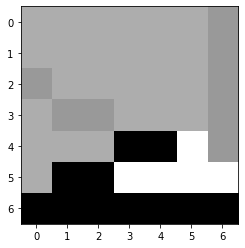

50


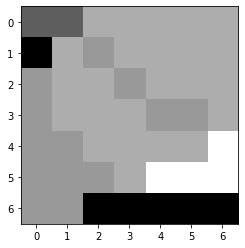

51


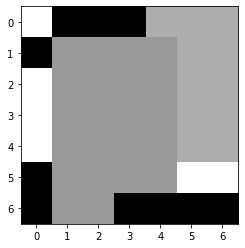

52


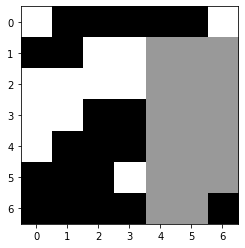

53


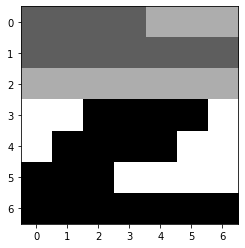

54


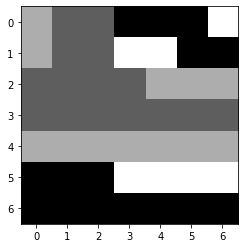

55


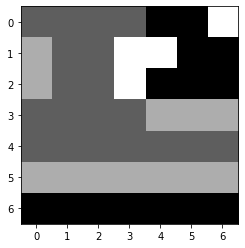

56


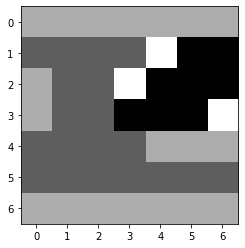

57


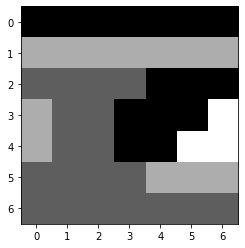

58


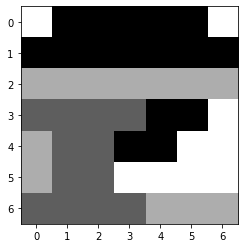

59


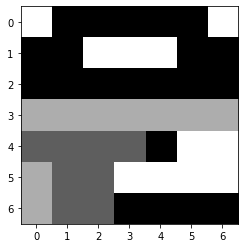

60


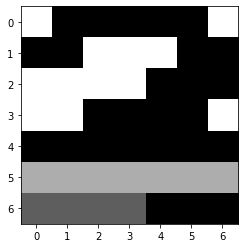

61


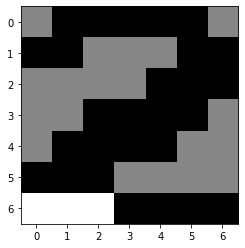

62


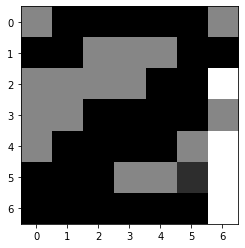

63


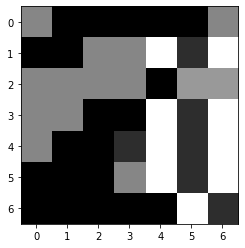

64


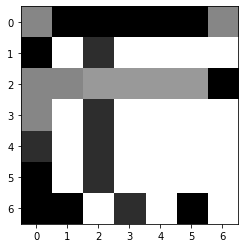

65


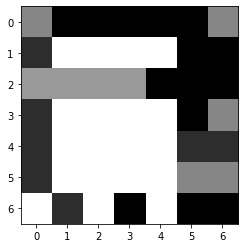

66


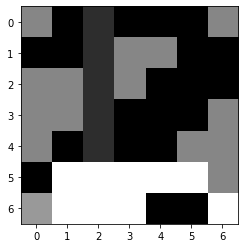

67


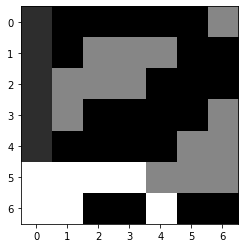

68


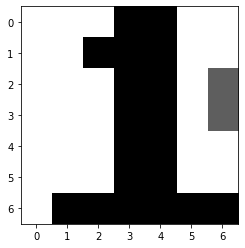

69


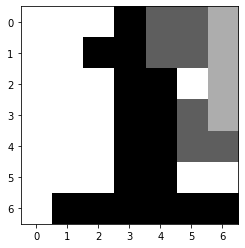

70


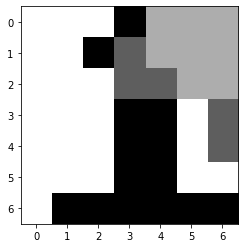

71


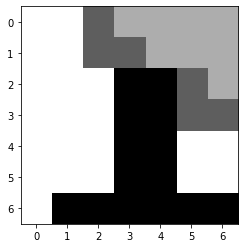

72


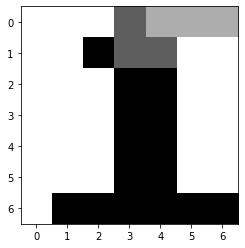

73


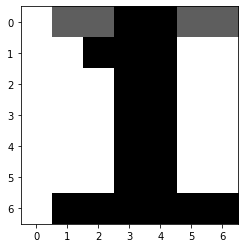

74


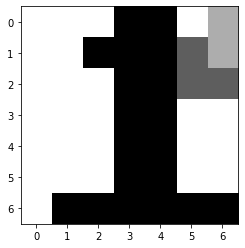

75


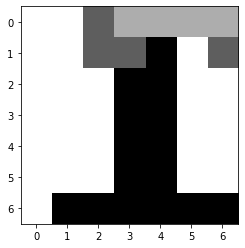

76


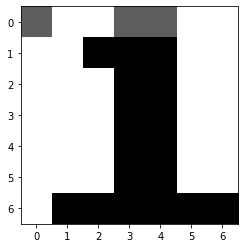

77


In [88]:
for i,image in enumerate(stage_display_2_lib):
    plt.imshow(image,cmap="Greys")
    plt.show()
    print(i)

In [74]:
del image_lib

In [77]:
numpy.save("./data_dump/stage_display_1_lib.npy",stage_display_1_lib)
numpy.save("./data_dump/stage_display_2_lib.npy",stage_display_2_lib)

In [96]:
print(stage_display_1_lib[0])

[[0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1.]]


In [161]:
file_stage_display_1 = open("./data_dump/stage_display_1_dictionary.npy", "wb")
pickle.dump(stage_display_1_dictionary, file_stage_display_1)
file_stage_display_1.close()

# dictionary

In [91]:
stage_display_2_dictionary = {
    1: [stage_display_2_lib[0], stage_display_2_lib[4], stage_display_2_lib[11], stage_display_2_lib[69], stage_display_2_lib[70],
        stage_display_2_lib[71], stage_display_2_lib[73], stage_display_2_lib[74], stage_display_2_lib[75], stage_display_2_lib[76],
        stage_display_2_lib[77]],
    2: [stage_display_2_lib[6], stage_display_2_lib[13], stage_display_2_lib[14], stage_display_2_lib[26], stage_display_2_lib[27], 
        stage_display_2_lib[28], stage_display_2_lib[29], stage_display_2_lib[30], stage_display_2_lib[31], stage_display_2_lib[32], 
        stage_display_2_lib[35], stage_display_2_lib[36], stage_display_2_lib[37], stage_display_2_lib[38], stage_display_2_lib[39], 
        stage_display_2_lib[47], stage_display_2_lib[48], stage_display_2_lib[53], stage_display_2_lib[54], stage_display_2_lib[62], 
        stage_display_2_lib[63]],
    3: [stage_display_2_lib[12]],
    4: [stage_display_2_lib[1], stage_display_2_lib[4]]
}

In [80]:
stage_display_1_dictionary = {
    1: [stage_display_1_lib[0], stage_display_1_lib[10], stage_display_1_lib[40], stage_display_1_lib[52], stage_display_1_lib[53],
        stage_display_1_lib[54]],
    2: [stage_display_1_lib[27], stage_display_1_lib[29], stage_display_1_lib[31], stage_display_1_lib[32], stage_display_1_lib[33],
        stage_display_1_lib[34], stage_display_1_lib[35], stage_display_1_lib[36], stage_display_1_lib[37]],
    3: [stage_display_1_lib[1],stage_display_1_lib[2], stage_display_1_lib[4]],
    4: [stage_display_1_lib[20], stage_display_1_lib[25], stage_display_1_lib[26], stage_display_1_lib[55], stage_display_1_lib[62],
        stage_display_1_lib[75], stage_display_1_lib[76]], 
    5: [stage_display_1_lib[61], stage_display_1_lib[104], stage_display_1_lib[105], stage_display_1_lib[109], stage_display_1_lib[111],
        stage_display_1_lib[112]], 
    6: [stage_display_1_lib[113], stage_display_1_lib[114], stage_display_1_lib[118], stage_display_1_lib[119], stage_display_1_lib[120]],
    7: [stage_display_1_lib[121], stage_display_1_lib[124], stage_display_1_lib[126]]
}

# Saving and Loading Dictionary

In [29]:
file_stage_display_1 = open("./data_dump/score_display_dictionary_1.npy", "wb")
pickle.dump(output1, file_stage_display_1)
file_stage_display_1.close()

In [162]:
file_stage_display_2 = open("./data_dump/stage_display_2_dictionary.npy", "wb")
pickle.dump(stage_display_2_dictionary, file_stage_display_2)
file_stage_display_2.close()

In [20]:
file_stage_display_1 = open("./data_dump/score_display_dictionary.npy", "rb")
output1 = pickle.load(file_stage_display_1)
print(output1[1][0])
file_stage_display_1.close()


[[0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1.]]


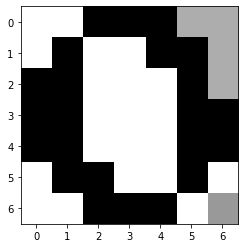

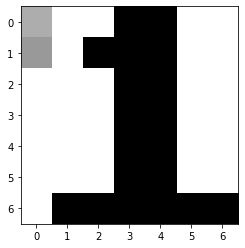

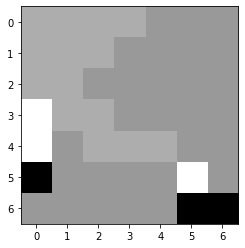

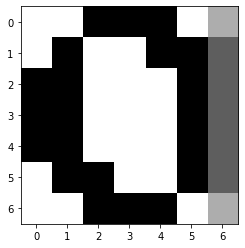

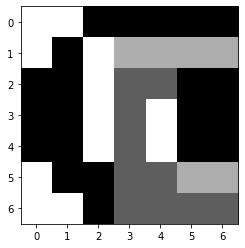

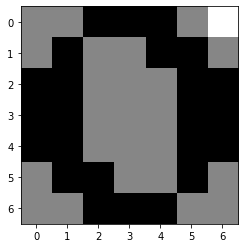

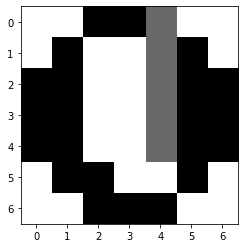

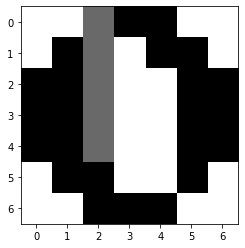

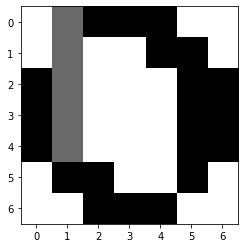

In [25]:
for i in range(20,29):
    plt.imshow(output1[0][i], cmap="Greys")
    plt.show()

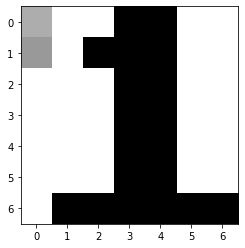

In [27]:
plt.imshow(output1[0][21], cmap="Greys")
plt.show()

In [28]:
output1[0].pop(21)

array([[0.42460317, 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.49206349, 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]])

# Comparison & Prediction

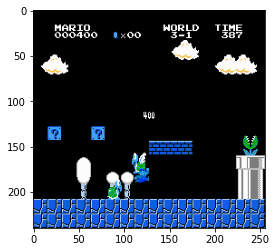

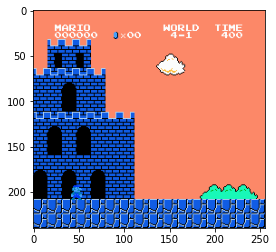

In [149]:
img1 = cv2.imread(f'game_frame/game_frame_participant_1/game_63225.png')
img2 = cv2.imread(f'game_frame/game_frame_participant_1/game_63226.png')
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [163]:
participant = 3
current_frame = 1
current_stage = "1-1"

In [164]:
new_stage_frame = []
current_stage = "1-1"
for frame_number in range(1,count_files(f'game_frame/game_frame_participant_{participant}/')):
    flag, next_stage = new_stage_check(frame_number, current_stage)
    if flag:
        current_stage = next_stage
        new_stage_frame.append(frame_number)
        print(f"{frame_number} {next_stage}")

3718 1-2
8056 1-3
16113 2-2
20626 1-4
26844 3-1
34893 4-1
38283 2-1
43099 2-3
51502 2-4
57470 3-2
63350 3-3
69711 3-4
76130 4-2
84269 4-3
88128 4-4
95937 5-1
99084 5-2
117096 5-3
123751 5-4


In [ ]:
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

In [ ]:
new_stage_display_A1bw = numpy.zeros(stage_display_A1bw.shape, stage_display_A1bw.dtype)
for y in range(stage_display_A1bw.shape[0]):
    for x in range(stage_display_A1bw.shape[1]):
        new_stage_display_A1bw[y,x] = numpy.clip(alpha*stage_display_A1bw[y,x] + beta, 0, 255)
plt.imshow(new_stage_display_A1bw, cmap='gray')
plt.show()
new_stage_display_A1bw

In [ ]:
stage_display_A1bw = cv2.cvtColor(stage_display_A1, cv2.COLOR_BGR2GRAY)
plt.imshow(stage_display_A1bw, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(stage_display_A1bw, 150, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()

In [ ]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('/content/svhn_best_cnn.h5')
#model = keras.models.load_model('/content/mnist.h5')
model = keras.models.load_model('/content/TFKeras.h5')

In [ ]:
imageA_stage_reshape = numpy.array(img.resize((28,28)))
imageA_stage_reshape = cv2.cvtColor(imageA_stage_reshape, cv2.COLOR_BGR2GRAY)

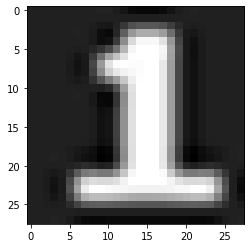

In [ ]:
plt.imshow(imageA_stage_reshape, cmap='gray')
plt.show()

In [ ]:
imageA_stage_reshape=imageA_stage_reshape.reshape(1,28,28,1)

In [ ]:
imageA_stage_reshape=imageA_stage_reshape.reshape(1,784)

In [ ]:
model.predict(imageA_stage_reshape)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)